In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import median_filter
from scipy.signal import butter, filtfilt
import pywt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_85.csv")
columns_to_drop = '0.00';
data = data.drop(columns=columns_to_drop, errors='ignore')
data = data.rename(columns={"Speed Right0.00": "Speed Right"})
print(data.columns)
data.to_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_85_updated.csv")

Index(['Speed Left', 'Speed Right'], dtype='object')


In [3]:
Ts = 0.01;
time_values = [i * Ts for i in range(len(data))]  
data["Time"] = time_values  
data.to_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_85_updated.csv")

In [4]:
data.describe()

,Speed Left,Speed Right,Time
count,196.000000,196.000000,196.000000
mean,51.326531,60.765306,0.975000
std,24.479725,29.455329,0.567245
min,0.000000,0.000000,0.000000
25%,60.000000,60.000000,0.487500
50%,60.000000,70.000000,0.975000
75%,60.000000,80.000000,1.462500
max,70.000000,80.000000,1.950000


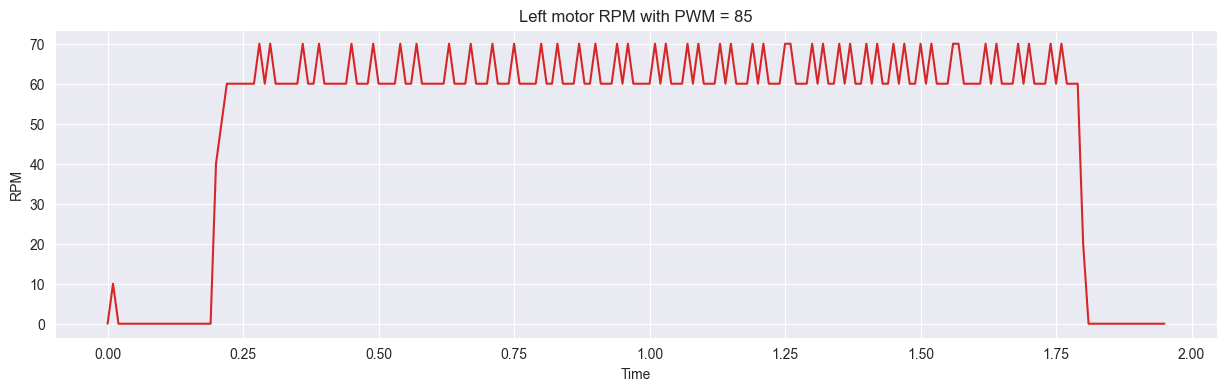

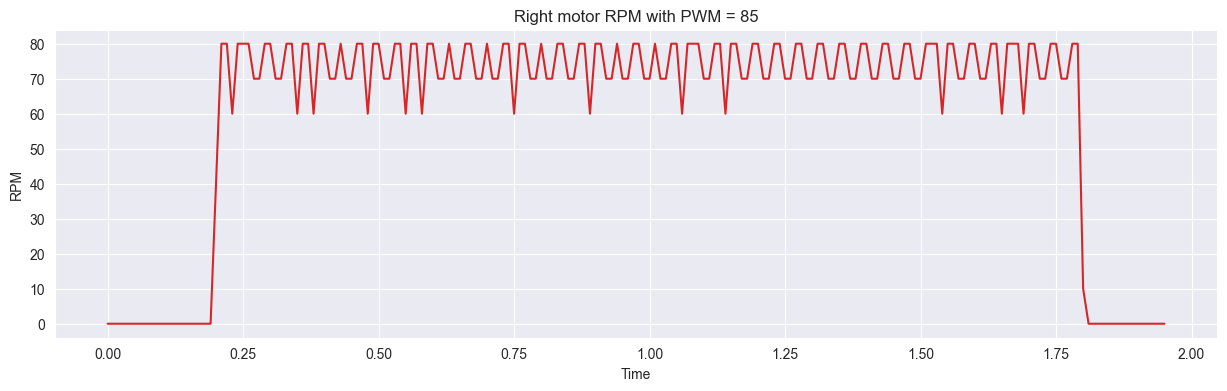

In [5]:
def plot_df(data, x, y, title="", xlabel='Time', ylabel='RPM', dpi=100):
 plt.figure(figsize=(15,4), dpi=dpi)
 plt.plot(x, y, color='tab:red')
 plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
 plt.show()

plot_df(data, x=data['Time'], y=data['Speed Left'], title='Left motor RPM with PWM = 85')
plot_df(data, x=data['Time'], y=data['Speed Right'], title='Right motor RPM with PWM = 85')

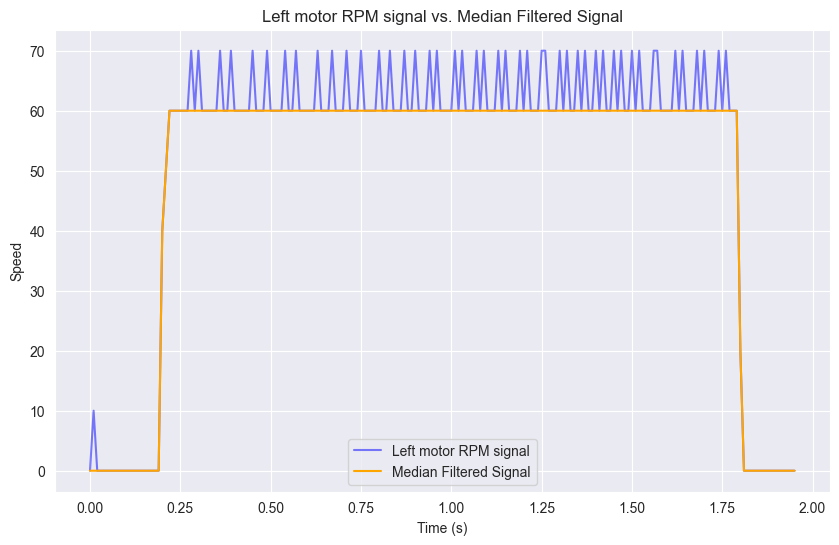

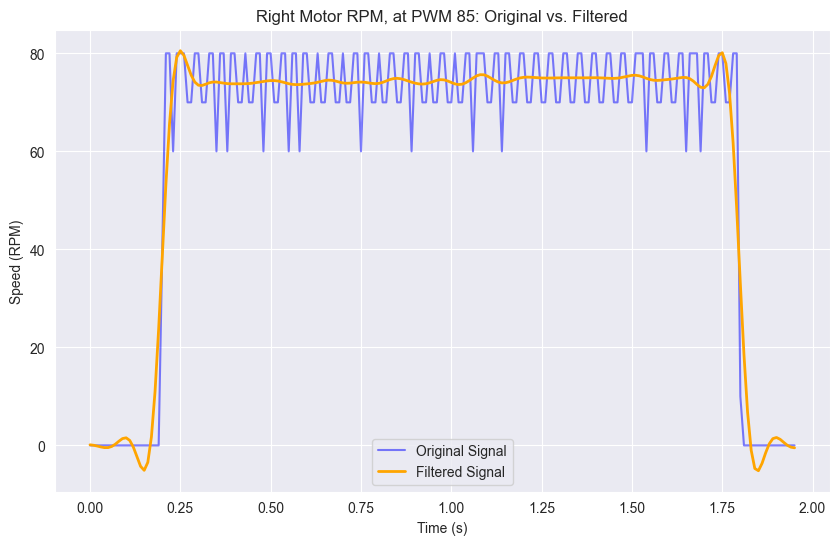

In [23]:
# Define the function with the correct argument order
def apply_median_filter(signal, label, time, size=5): 
    # Apply the median filter
    filtered_data = median_filter(signal, size=size) 

    # Plot the original and filtered signals
    plt.figure(figsize=(10, 6)) 
    plt.plot(time, signal, label=label, color='blue', alpha=0.5) 
    plt.plot(time, filtered_data, label='Median Filtered Signal', color='orange') 
    plt.title(label + ' vs. Median Filtered Signal') 
    plt.xlabel('Time (s)')
    plt.ylabel('Speed')
    plt.legend() 
    plt.show() 

    return filtered_data 


time = data["Time"].values
speedLeftSignal = data['Speed Left'].values
speedRightSignal = data['Speed Right'].values

median_filtered_left = apply_median_filter(speedLeftSignal, 'Left motor RPM signal', time)
# median_filtered_right = apply_median_filter(speedRightSignal, 'Right motor RPM signal', time)

def low_pass_filter(signal, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

fs = 100  # Sampling frequency (1 / 0.01 seconds)
cutoff = 10  # Desired cutoff frequency in Hz

speed_right_signal = data['Speed Right'].values
filtered_signal_right = low_pass_filter(speed_right_signal, cutoff, fs)
time = data['Time'].values;

plt.figure(figsize=(10, 6))
plt.plot(time, speed_right_signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(time, filtered_signal_right, label='Filtered Signal', color='orange', linewidth=2)
plt.title("Right Motor RPM, at PWM 85: Original vs. Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from scipy.io import savemat
import numpy as np
signal_left85 = {"time": time, 'signal': median_filtered_left}
signal_right85 = {"time": time, 'signal': filtered_signal_right}
savemat("filtered_signal_left85.mat",signal_left85)
savemat("filtered_signal_right85.mat",signal_right85)

In [24]:
data_255 = pd.read_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_255.csv")

In [25]:
columns_to_drop = '70.00';
data_255 = data_255.drop(columns=columns_to_drop, errors='ignore');
data_255 = data_255.rename(columns={'Speed Right\tð0.00': "Speed Right"})
print(data_255.columns)
print(data_255.head())

Index(['Speed Left', 'Speed Right'], dtype='object')
   Speed Left  Speed Right
0         0.0        130.0
1         0.0        120.0
2         0.0        130.0
3         0.0        130.0
4         0.0        120.0


In [26]:
Ts = 0.01;
time_values = [i * Ts for i in range(len(data_255))]  
data_255["Time"] = time_values  
data_255.to_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_255_updated.csv")

In [27]:
data_255.describe()

,Speed Left,Speed Right,Time
count,153.000000,153.000000,153.000000
mean,154.967320,153.398693,0.760000
std,36.112474,10.141330,0.443114
min,0.000000,100.000000,0.000000
25%,160.000000,150.000000,0.380000
50%,160.000000,160.000000,0.760000
75%,170.000000,160.000000,1.140000
max,170.000000,160.000000,1.520000


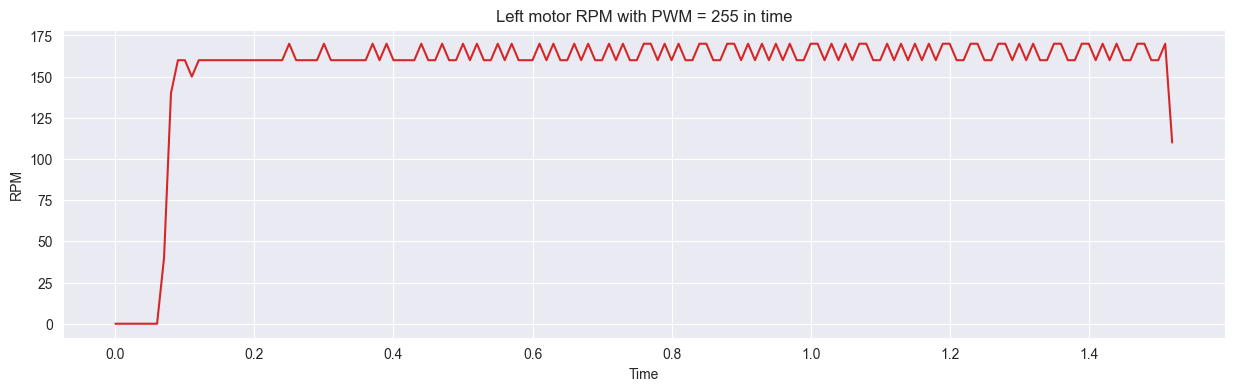

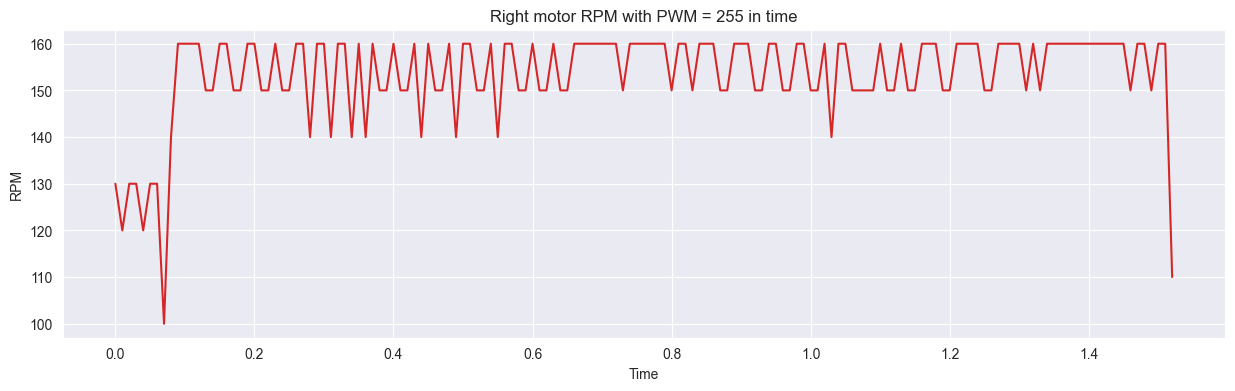

In [28]:
def plot_df(data, x, y, title="", xlabel='Time', ylabel='RPM', dpi=100):
 plt.figure(figsize=(15,4), dpi=dpi)
 plt.plot(x, y, color='tab:red')
 plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
 plt.show()

plot_df(data, x=data_255['Time'], y=data_255['Speed Left'], title='Left motor RPM with PWM = 255 in time')
plot_df(data, x=data_255['Time'], y=data_255['Speed Right'], title='Right motor RPM with PWM = 255 in time')

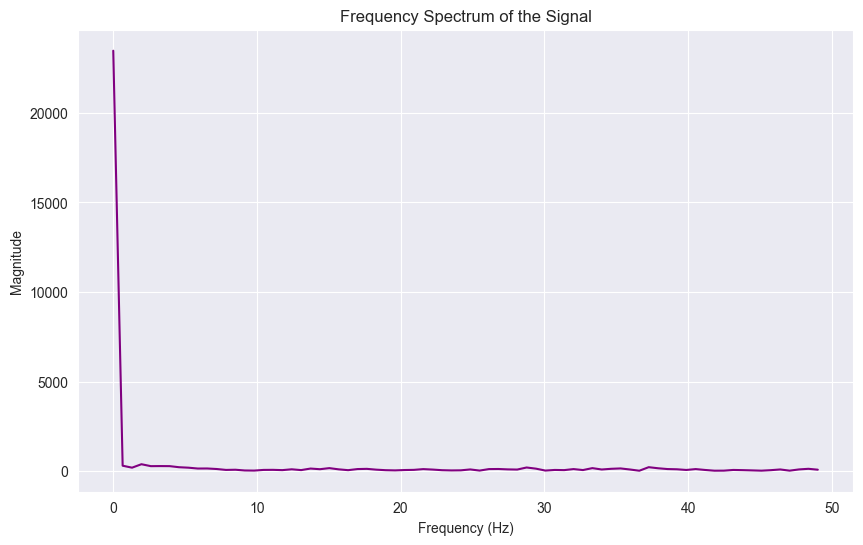

In [69]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
speed_right_signal = data_255["Speed Right"].values
# Parameters
fs = 100  # Sampling frequency in Hz
n = len(speed_right_signal)  # Number of samples

# FFT
fft_values = fft(speed_right_signal)
fft_magnitude = np.abs(fft_values)[:n // 2]  # Keep positive frequencies
freq = fftfreq(n, 1/fs)[:n // 2]  # Corresponding frequency values

# Plot FFT
plt.figure(figsize=(10, 6))
plt.plot(freq, fft_magnitude, color='purple')
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

In [71]:
print(len(time), len(speed_right_signal))

196 153


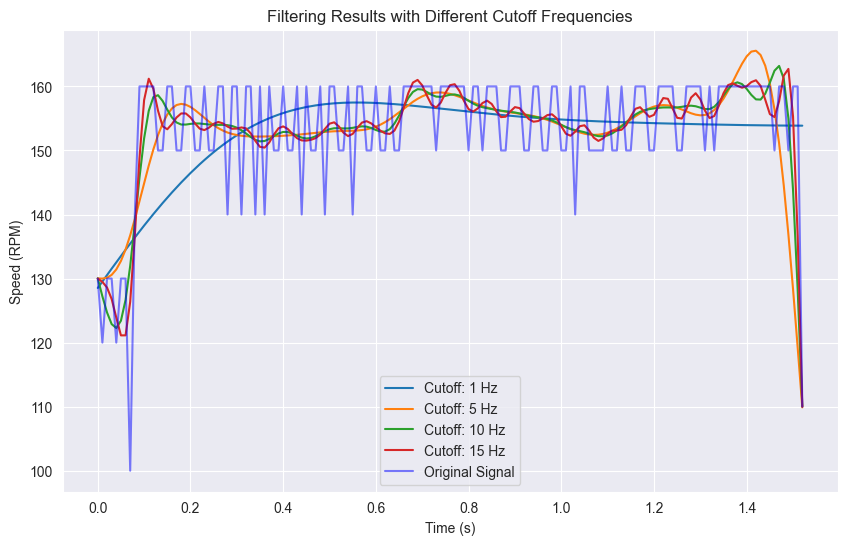

In [88]:
from scipy.signal import butter, filtfilt

def low_pass_filter(signal, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Try different cutoff frequencies
cutoffs = [1,5, 10, 15]  # Example cutoff frequencies in Hz
plt.figure(figsize=(10, 6))
time = time[:len(speed_right_signal)]
for cutoff in cutoffs:
    filtered_signal = low_pass_filter(speed_right_signal, cutoff, fs)
    plt.plot(time, filtered_signal, label=f"Cutoff: {cutoff} Hz")

plt.plot(time, speed_right_signal, label="Original Signal", color='blue', alpha=0.5)
plt.title("Filtering Results with Different Cutoff Frequencies")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()

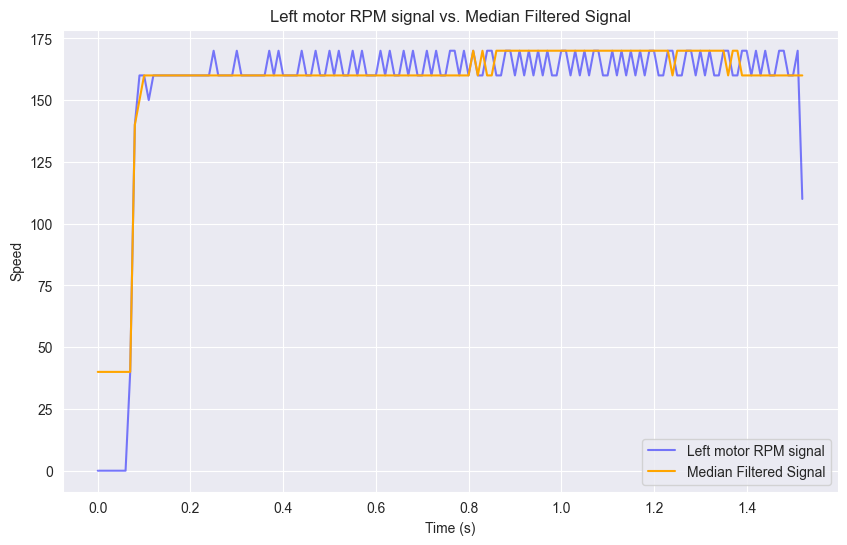

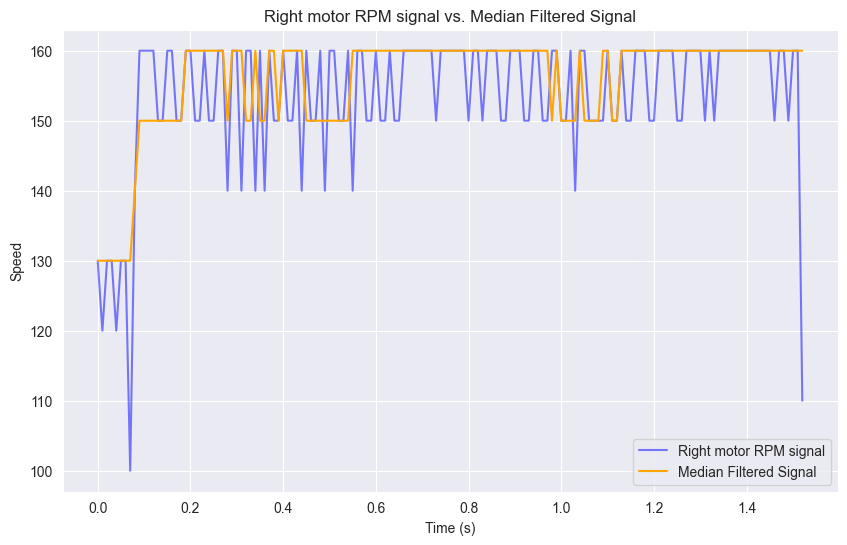

In [33]:
# Define the function with the correct argument order
def apply_median_filter(signal, label, time, size=30): 
    # Apply the median filter
    filtered_data = median_filter(signal, size=size) 

    # Plot the original and filtered signals
    plt.figure(figsize=(10, 6)) 
    plt.plot(time, signal, label=label, color='blue', alpha=0.5) 
    plt.plot(time, filtered_data, label='Median Filtered Signal', color='orange') 
    plt.title(label + ' vs. Median Filtered Signal') 
    plt.xlabel('Time (s)')
    plt.ylabel('Speed')
    plt.legend() 
    plt.show() 

    return filtered_data 


time = data_255["Time"].values
speedLeftSignal = data_255['Speed Left'].values
speedRightSignal = data_255['Speed Right'].values

median_filtered_left = apply_median_filter(speedLeftSignal, 'Left motor RPM signal', time)
median_filtered_right = apply_median_filter(speedRightSignal, 'Right motor RPM signal', time)


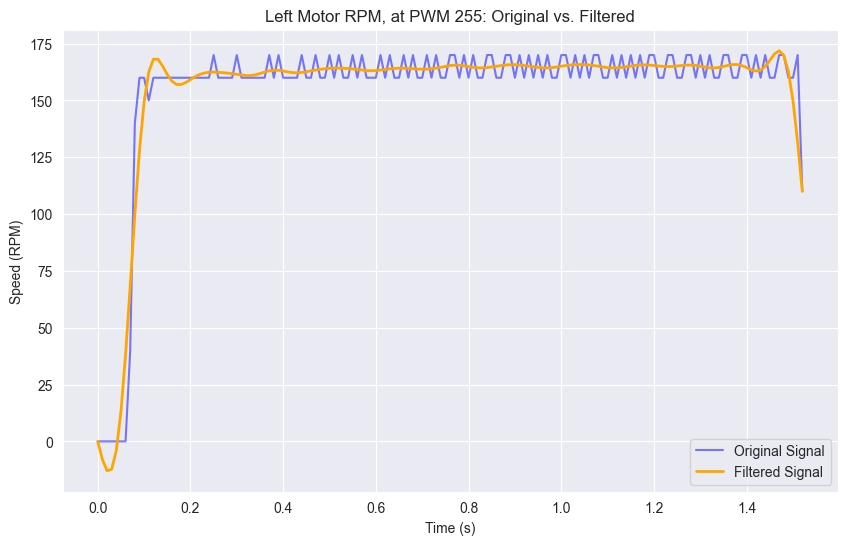

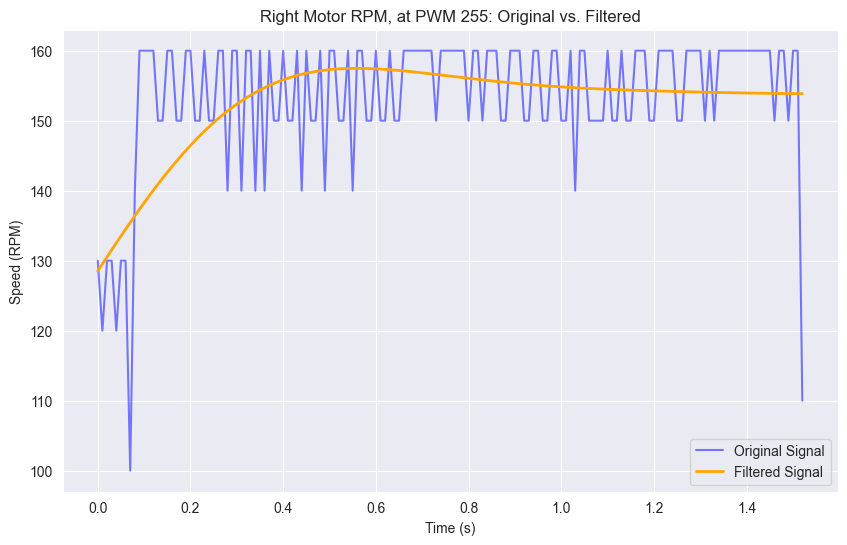

In [89]:
from scipy.signal import butter, filtfilt

def low_pass_filter(signal, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

fs = 100  # Sampling frequency (1 / 0.01 seconds)
cutoff = 10  # Desired cutoff frequency in Hz

speed_left_signal = data_255['Speed Left'].values
filtered_signal_left = low_pass_filter(speed_left_signal, cutoff, fs)
time = data_255['Time'].values;

plt.figure(figsize=(10, 6))
plt.plot(time, speedLeftSignal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(time, filtered_signal_left, label='Filtered Signal', color='orange', linewidth=2)
plt.title("Left Motor RPM, at PWM 255: Original vs. Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()

cutoff = 1
speed_right_signal = data_255['Speed Right'].values
filtered_signal_right = low_pass_filter(speed_right_signal, cutoff, fs)
time = data_255['Time'].values;

plt.figure(figsize=(10, 6))
plt.plot(time, speed_right_signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(time, filtered_signal_right, label='Filtered Signal', color='orange', linewidth=2)
plt.title("Right Motor RPM, at PWM 255: Original vs. Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()

In [90]:
from scipy.io import savemat
import numpy as np
signal_right255 = {"time": time, 'signal': filtered_signal_right}
savemat("filtered_signal_right255.mat",signal_right255)

In [42]:
from scipy.io import savemat
import numpy as np
signal_left255 = {"time": time, 'signal': filtered_signal_left}
savemat("filtered_signal_left255.mat",signal_left255)

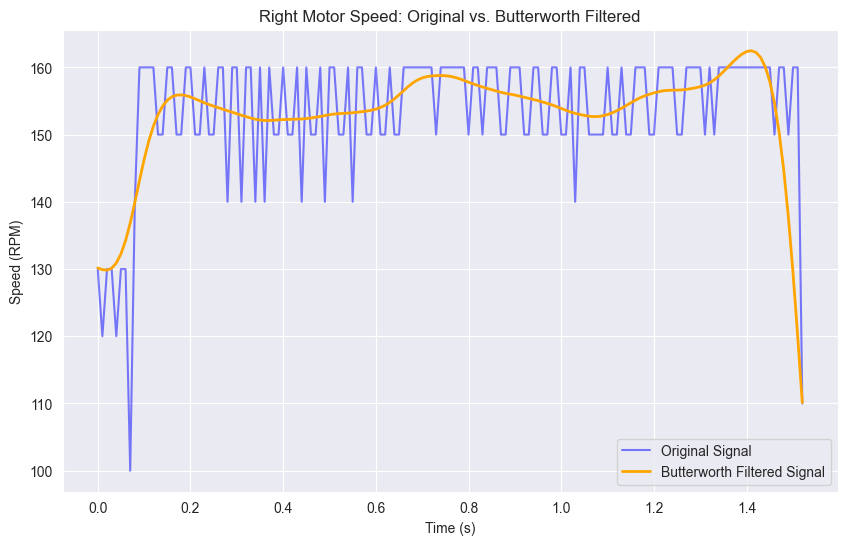

In [60]:
from scipy.signal import butter, filtfilt

# Define the Butterworth filter
def butter_lowpass_filter(data, cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Apply Butterworth filter
fs = 100  # Sampling frequency (e.g., 100 Hz)
cutoff = 5  # Cutoff frequency (e.g., 5 Hz)
speed_right_signal = data_255['Speed Right'].values
filtered_signal_right = butter_lowpass_filter(speedRightSignal, cutoff, fs)

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(time, speed_right_signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(time, filtered_signal_right, label='Butterworth Filtered Signal', color='orange', linewidth=2)
plt.title("Right Motor Speed: Original vs. Butterworth Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()


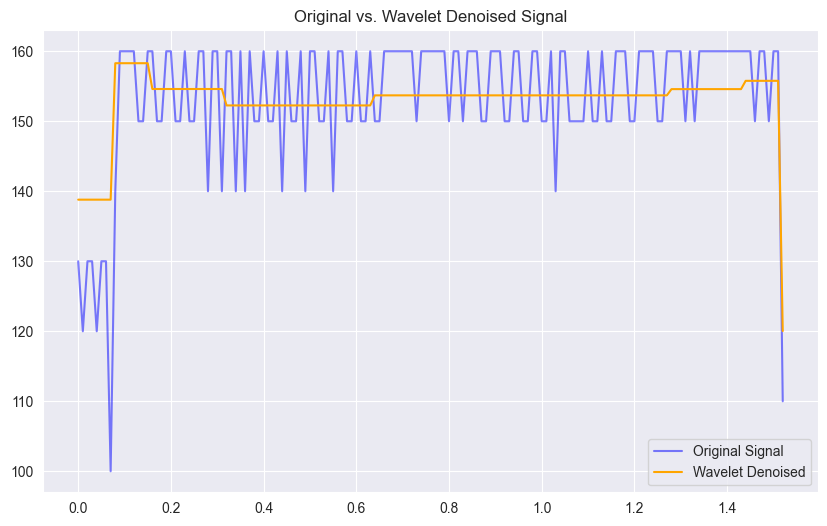

In [6]:
# Wavelet denoising
def wavelet_denoising(data, time,wavelet='db1', level=2):
 coeffs = pywt.wavedec(data, wavelet, mode="per")
 threshold = np.sqrt(2 * np.log(len(data))) * np.median(np.abs(coeffs[-level])) / 0.6745
 coeffs[1:] = (pywt.threshold(i, threshold, mode='soft') for i in coeffs[1:])
 filtered_data = pywt.waverec(coeffs, wavelet, mode="per")
 
 filtered_data = filtered_data[:len(data)]

 # Plotting
 plt.figure(figsize=(10, 6))
 plt.plot(time, speed_right_signal, label='Original Signal', color='blue', alpha=0.5)
 plt.plot(time, filtered_data, label='Wavelet Denoised', color='orange')
 plt.title('Original vs. Wavelet Denoised Signal')
 plt.legend()
 plt.show()

 return filtered_data
# Apply filters and plot results
data_255 = pd.read_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_255_updated.csv")
sampling_rate = 100 
cutoff = 40 # Hz, as EEG signals of interest are typically below this frequency
speed_right_signal = data_255['Speed Right'].values
time = data_255['Time'].values
# Apply each filter and visualize immediately
wavelet_filtered = wavelet_denoising(speed_right_signal,time)

In [52]:
data_128 = pd.read_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_128.csv")

In [53]:
print(data_128.columns)

Index(['Speed Left', 'Speed Right0.00', '0.00'], dtype='object')


In [54]:
columns_to_drop = '0.00';
data_128 = data_128.drop(columns=columns_to_drop, errors='ignore');
data_128 = data_128.rename(columns={'Speed Right0.00': "Speed Right"})
print(data_128.columns)
print(data_128.head())

Index(['Speed Left', 'Speed Right'], dtype='object')
  Speed Left  Speed Right
0       0.00          0.0
1       0.00          0.0
2       0.00          0.0
3       0.00         10.0
4      30.00         40.0


In [55]:
Ts = 0.01;
time_values = [i * Ts for i in range(len(data_128))]  
data_128["Time"] = time_values  
data_128.to_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\PWM_128_updated.csv")

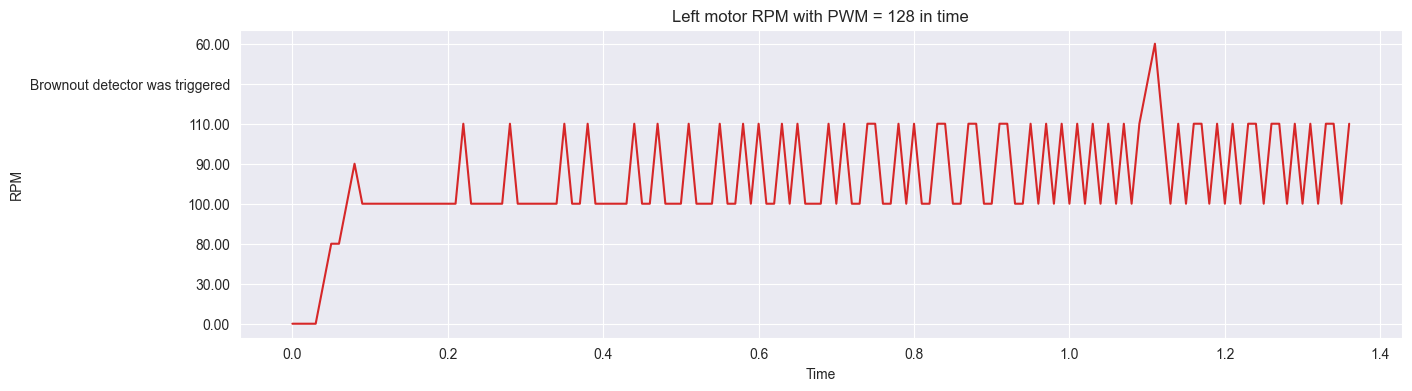

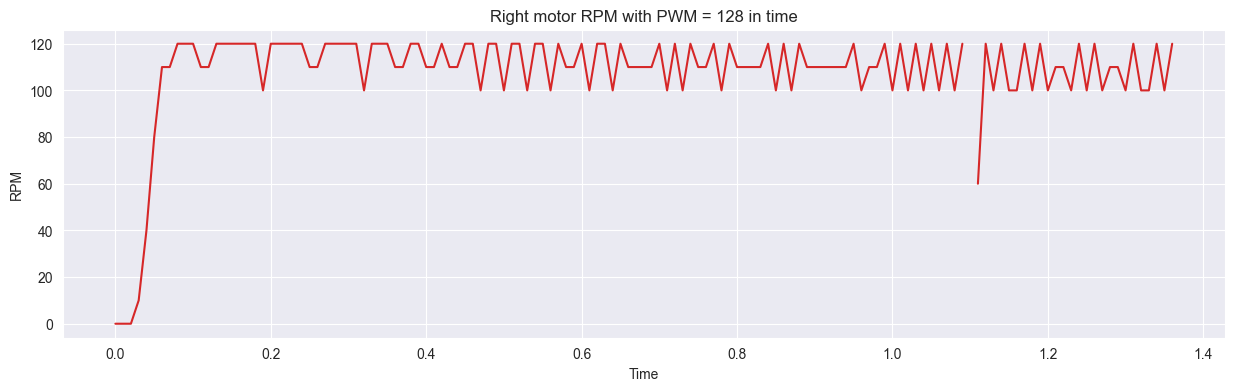

In [56]:
def plot_df(data, x, y, title="", xlabel='Time', ylabel='RPM', dpi=100):
 plt.figure(figsize=(15,4), dpi=dpi)
 plt.plot(x, y, color='tab:red')
 plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
 plt.show()

plot_df(data_128, x=data_128['Time'], y=data_128['Speed Left'], title='Left motor RPM with PWM = 128 in time')
plot_df(data_128, x=data_128['Time'], y=data_128['Speed Right'], title='Right motor RPM with PWM = 128 in time')

In [59]:
print(data_128.dtypes)
print(data_128['Speed Left'].unique())
data_128['Speed Left'] = pd.to_numeric(data_128['Speed Left'], errors='coerce')
data_128 = data_128.dropna(subset=['Speed Left'])
data_128['Speed Left'].fillna(0, inplace=True)

Speed Left      object
Speed Right    float64
Time           float64
dtype: object
['0.00' '30.00' '80.00' '100.00' '90.00' '110.00'
 'Brownout detector was triggered' '60.00']


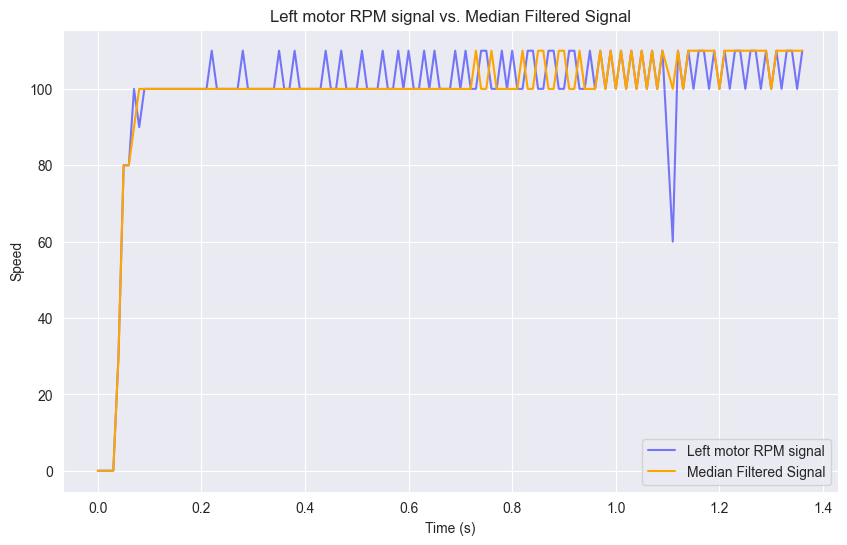

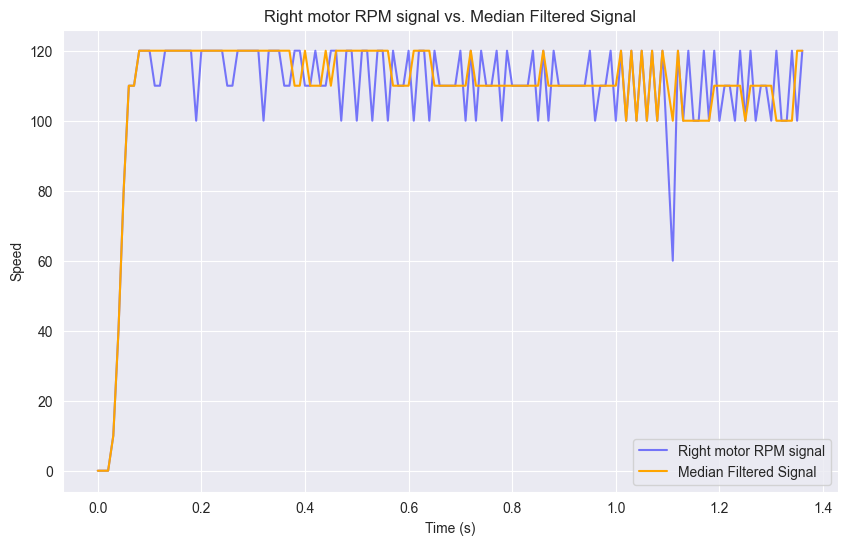

In [60]:
# Define the function with the correct argument order
def apply_median_filter(signal, label, time, size=5): 
    # Apply the median filter
    filtered_data = median_filter(signal, size=size) 

    # Plot the original and filtered signals
    plt.figure(figsize=(10, 6)) 
    plt.plot(time, signal, label=label, color='blue', alpha=0.5) 
    plt.plot(time, filtered_data, label='Median Filtered Signal', color='orange') 
    plt.title(label + ' vs. Median Filtered Signal') 
    plt.xlabel('Time (s)')
    plt.ylabel('Speed')
    plt.legend() 
    plt.show() 

    return filtered_data 


time = data_128["Time"].values
speedLeftSignal = data_128['Speed Left'].values
speedRightSignal = data_128['Speed Right'].values

median_filtered_left = apply_median_filter(speedLeftSignal, 'Left motor RPM signal', time)
median_filtered_right = apply_median_filter(speedRightSignal, 'Right motor RPM signal', time)


In [23]:
import numpy as np

# Define a function to remove outliers using IQR
def remove_outliers_iqr(signal):
    q1 = np.percentile(signal, 25)  # First quartile (25th percentile)
    q3 = np.percentile(signal, 75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Mask the values that are within the bounds
    filtered_signal = signal[(signal >= lower_bound) & (signal <= upper_bound)]

    return filtered_signal, lower_bound, upper_bound

# Apply to the Speed Left signal
speed_left_filtered, lower, upper = remove_outliers_iqr(speedLeftSignal)

# Print the detected bounds
print(f"Lower Bound: {lower}, Upper Bound: {upper}")

Lower Bound: 85.0, Upper Bound: 125.0


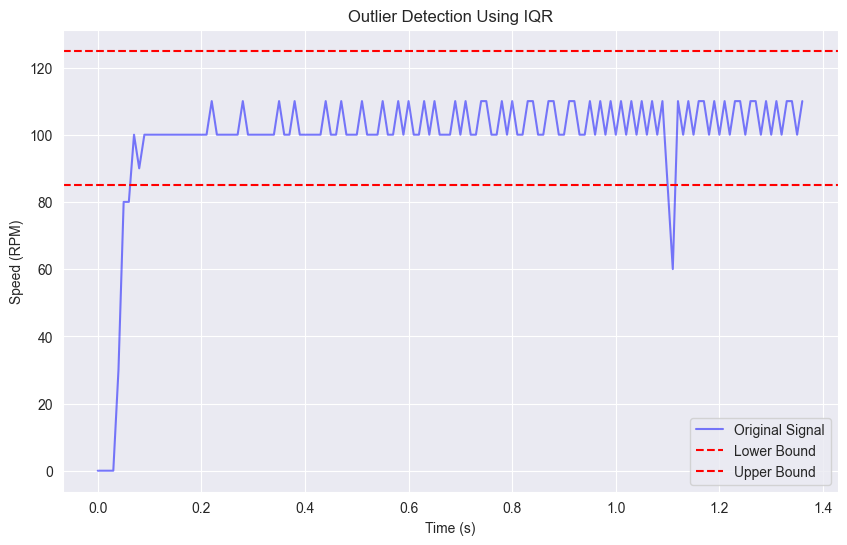

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time, speedLeftSignal, label='Original Signal', color='blue', alpha=0.5)
plt.axhline(lower, color='red', linestyle='--', label='Lower Bound')
plt.axhline(upper, color='red', linestyle='--', label='Upper Bound')
plt.title('Outlier Detection Using IQR')
plt.xlabel('Time (s)')
plt.ylabel('Speed (RPM)')
plt.legend()
plt.show()

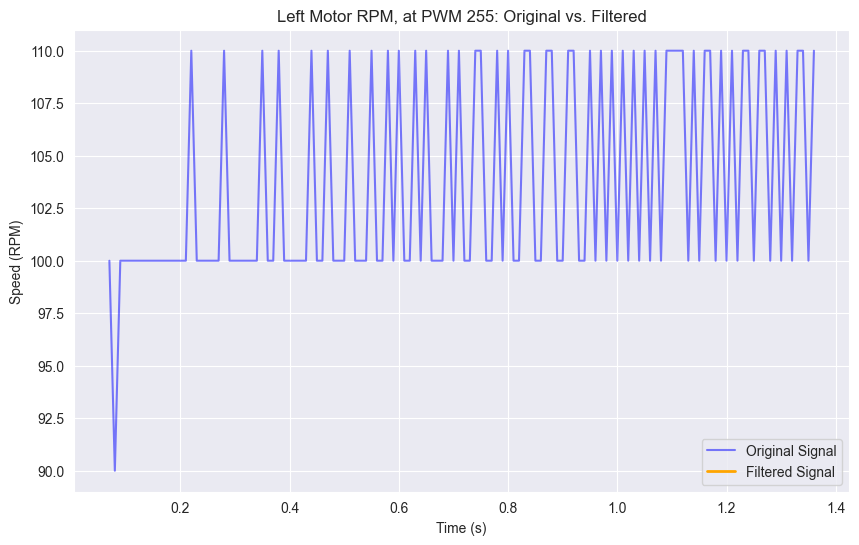

In [32]:
# Replace outliers with NaN, then interpolate or fill with a specific value
data_128['Speed Left'] = np.where(
    (data_128['Speed Left'] < lower) | (data_128['Speed Left'] > upper),
    np.nan,  # Replace outliers with NaN
    data_128['Speed Left']  # Keep the valid data
)

# Interpolate to fill the missing data (optional)
data_128['Speed Left'].interpolate(method='linear', inplace=True)

fs = 100  # Sampling frequency (1 / 0.01 seconds)
cutoff = 15  # Desired cutoff frequency in Hz

# Apply the median filter after handling outliers
filtered_signal_left = low_pass_filter(speed_left_signal, cutoff, fs)
plt.figure(figsize=(10, 6))
plt.plot(time, speed_left_signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(time, filtered_signal_left, label='Filtered Signal', color='orange', linewidth=2)
plt.title("Left Motor RPM, at PWM 255: Original vs. Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()

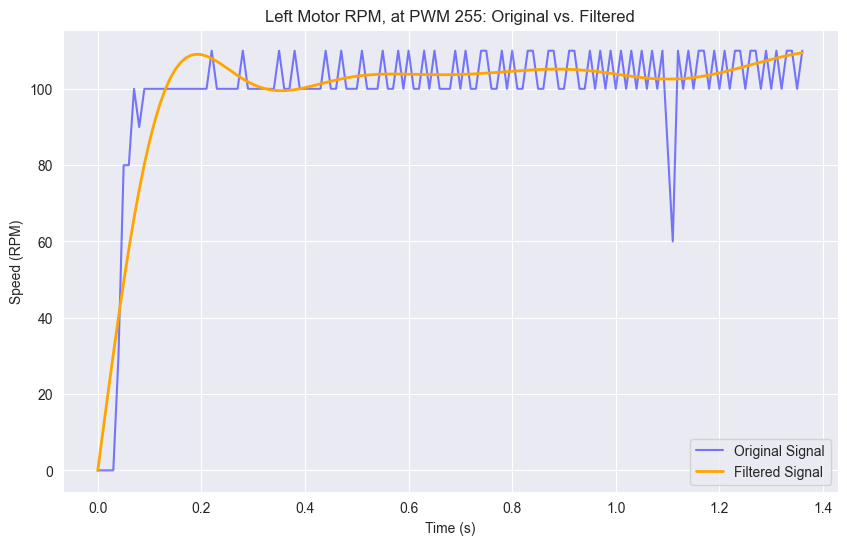

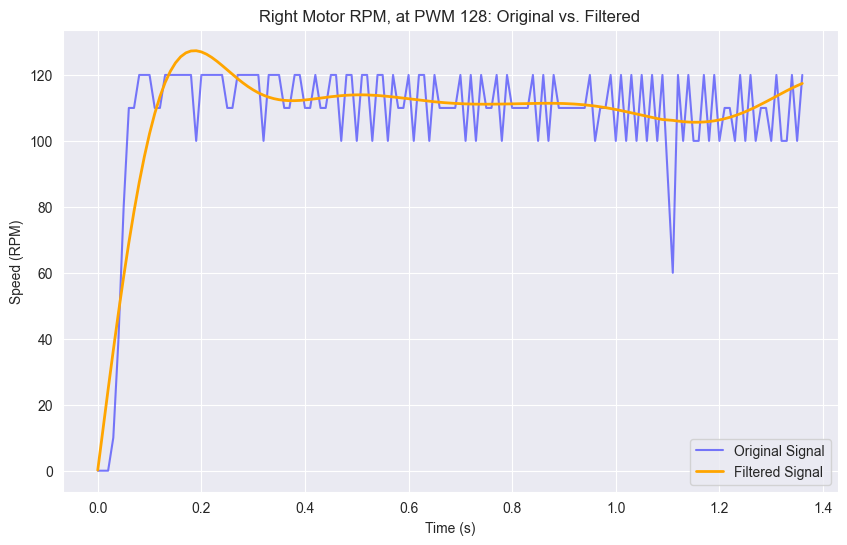

In [62]:
from scipy.signal import butter, filtfilt

def low_pass_filter(signal, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

fs = 100  # Sampling frequency (1 / 0.01 seconds)
cutoff = 3

speed_left_signal = data_128['Speed Left'].values
filtered_signal_left = low_pass_filter(speed_left_signal, cutoff, fs)
plt.figure(figsize=(10, 6))
plt.plot(time, speed_left_signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(time, filtered_signal_left, label='Filtered Signal', color='orange', linewidth=2)
plt.title("Left Motor RPM, at PWM 255: Original vs. Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()


speed_right_signal = data_128['Speed Right'].values
filtered_signal_right = low_pass_filter(speed_right_signal, cutoff, fs)
time = data_128['Time'].values;

plt.figure(figsize=(10, 6))
plt.plot(time, speed_right_signal, label='Original Signal', color='blue', alpha=0.5)
plt.plot(time, filtered_signal_right, label='Filtered Signal', color='orange', linewidth=2)
plt.title("Right Motor RPM, at PWM 128: Original vs. Filtered")
plt.xlabel("Time (s)")
plt.ylabel("Speed (RPM)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from scipy.io import savemat
import numpy as np
signal_right128 = {"time": time, 'signal': filtered_signal_right}
savemat("filtered_signal_right128.mat",signal_right128)

In [63]:
from scipy.io import savemat
import numpy as np
signal_left128 = {"time": time, 'signal': filtered_signal_left}
savemat("filtered_signal_left128.mat",signal_left128)